#**Proyecto**

###Objetivos


1.  Preparación de datos
2.  Construcción del modelo de red neuronal recurrente
3.  Entrenamiento del modelo
4.  Evaluación del modelo 

###Aplicación

> Clasificación de sentimientos en reseñas de películas. El objetivo es determinar si una reseña en particular es positiva o negativa. Esto para permitir a los sitios web o aplicaciones recopilar información sobre la satisfacción del usuario y mejorar la calidad de sus recomendaciones. Extrayendo información útil sobre los aspectos que los usuarios aprecian o critican en las películas utilizando el data set alojado en keras de imbd y una red neuronal recurrente




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from IPython.display import display
from tabulate import tabulate
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import plot_model

####1.  Preparación de datos


In [ ]:
# Carga de datos de la base de datos IMDB para procesamiento
max_features = 10000
maxlen = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
# Obtener el número total de críticas en la base de datos IMDB
num_reviews = len(x_train) + len(x_test)
print('\033[1m' + 'Número total de críticas:' + '\033[0m', num_reviews)


Número total de críticas: 50000


In [ ]:
# Obtener la distribución de sentimientos en la base de datos IMDB
num_positive = sum(y_train) + sum(y_test)
num_negative = num_reviews - num_positive

print('\033[1m' + 'Distribución de sentimientos' + '\033[0m')
print('Positivas:', num_positive)
print('Negativas:', num_negative)

Distribución de sentimientos
Positivas: 25000
Negativas: 25000


######1.1  Visualización de datos

In [ ]:
# Obtener el índice de la palabra para usar en la decodificación
word_index = imdb.get_word_index()

# Invertir el índice de la palabra para que podamos decodificar las secuencias de números enteros en palabras
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Decodificar una crítica de la base de datos IMDB
def decode_review(review):
    # Las primeras tres palabras son reservadas y deben ser omitidas
    decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in review])
    return decoded_review

print('\033[1m' + 'Primera reseña:' + '\033[0m')
# Decodificar la primera crítica en la base de datos IMDB
display(decode_review(x_train[0]))


Primera reseña:


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

######1.2  Selección de validación

In [ ]:
# Carga de los datos de la base de datos IMDB y dividir en conjuntos de entrenamiento y prueba, con una validación del 50%
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
x_val = x_test[:12500]
y_val = y_test[:12500]
x_test = x_test[12500:]
y_test= y_test[12500:]

######1.2.1  Distribución

In [ ]:
##Entrenamiento
# Obtener el número total de críticas en la base de datos IMDB
num_reviews = len(x_train)
print('\033[1m' + 'Número total de críticas:' + '\033[0m', num_reviews)

Número total de críticas: 25000


In [ ]:
# Obtener la distribución de sentimientos en la base de datos IMDB
num_positive = sum(y_train)
num_negative = num_reviews - num_positive

print('\033[1m' + 'Distribución de sentimientos' + '\033[0m')
print('Positivas:', num_positive)
print('Negativas:', num_negative)

Distribución de sentimientos
Positivas: 12500
Negativas: 12500


In [ ]:
##Validación
# Obtener el número total de críticas en la base de datos IMDB
num_reviews = len(x_val)
print('\033[1m' + 'Número total de críticas:' + '\033[0m', num_reviews)

Número total de críticas: 12500


In [ ]:
# Obtener la distribución de sentimientos en la base de datos IMDB
num_positive = sum(y_val)
num_negative = num_reviews - num_positive

print('\033[1m' + 'Distribución de sentimientos' + '\033[0m')
print('Positivas:', num_positive)
print('Negativas:', num_negative)

Distribución de sentimientos
Positivas: 6184
Negativas: 6316


In [ ]:
##Test
# Obtener el número total de críticas en la base de datos IMDB
num_reviews = len(x_test)
print('\033[1m' + 'Número total de críticas:' + '\033[0m', num_reviews)

Número total de críticas: 12500


In [ ]:
# Obtener la distribución de sentimientos en la base de datos IMDB
num_positive = sum(y_test)
num_negative = num_reviews - num_positive

print('\033[1m' + 'Distribución de sentimientos' + '\033[0m')
print('Positivas:', num_positive)
print('Negativas:', num_negative)

Distribución de sentimientos
Positivas: 6316
Negativas: 6184


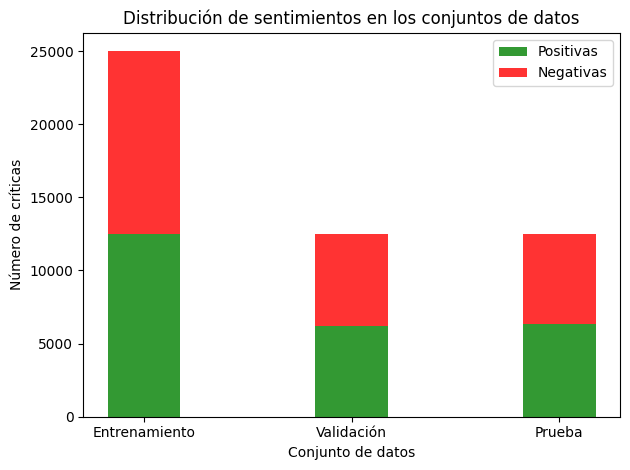

In [ ]:
# Datos
num_reviews = [len(x_train), len(x_val), len(x_test)]
num_positive = [sum(y_train), sum(y_val), sum(y_test)]
num_negative = [num_reviews[i] - num_positive[i] for i in range(3)]

# Etiquetas de los conjuntos de datos
datasets = ['Entrenamiento', 'Validación', 'Prueba']

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Configurar las barras
bar_width = 0.35
opacity = 0.8

# Graficar las barras positivas
rects1 = ax.bar(datasets, num_positive, bar_width,
                alpha=opacity, color='g', label='Positivas')

# Graficar las barras negativas
rects2 = ax.bar(datasets, num_negative, bar_width,
                alpha=opacity, color='r', label='Negativas',
                bottom=num_positive)

# Etiquetas y título del gráfico
ax.set_xlabel('Conjunto de datos')
ax.set_ylabel('Número de críticas')
ax.set_title('Distribución de sentimientos en los conjuntos de datos')
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

####2. Construcción de modelos de red neuronal recurrente

In [ ]:
#[TensorFlow 2.0] Text Classification with an RNN in Keras 
#https://financial-engineering.medium.com/tensorflow-2-0-text-classification-with-an-rnn-15220b5201b1

# Definición de la red neuronal simple
model1 = Sequential()
model1.add(Embedding(max_features, 32))
model1.add(SimpleRNN(32))
model1.add(Dense(1, activation='sigmoid'))

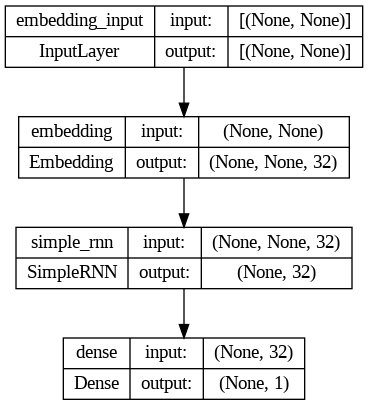

In [ ]:
# Graficar la arquitectura del modelo
plot_model(model1, to_file='modelo.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Definición de la red neuronal simple
model2 = Sequential()
model2.add(Embedding(max_features, 64))
model2.add(SimpleRNN(64))
model2.add(Dense(1, activation='sigmoid'))

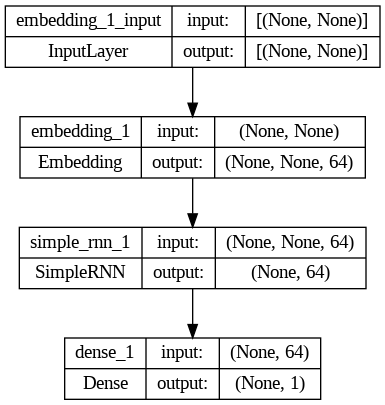

In [ ]:
# Graficar la arquitectura del modelo
plot_model(model2, to_file='modelo.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Definición de la red neuronal simple
model3 = Sequential()
model3.add(Embedding(max_features, 32))
model3.add(SimpleRNN(16))
model3.add(Dense(1, activation='sigmoid'))

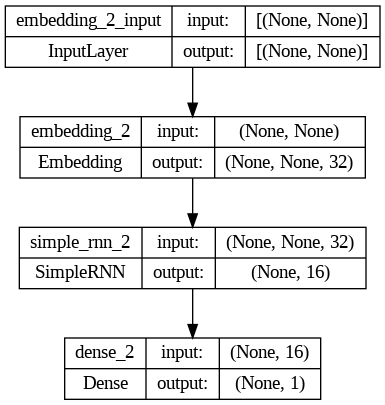

In [ ]:
# Graficar la arquitectura del modelo
plot_model(model3, to_file='modelo.png', show_shapes=True, show_layer_names=True)

####3. Entrenamiento de modelos


In [ ]:
# Entrenamiento
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history1 = model1.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/10
196/196 [==============================] - 23s 112ms/step - loss: 0.6146 - acc: 0.6409 - val_loss: 0.7683 - val_acc: 0.6133
Epoch 2/10
196/196 [==============================] - 22s 112ms/step - loss: 0.3948 - acc: 0.8334 - val_loss: 0.3538 - val_acc: 0.8546
Epoch 3/10
196/196 [==============================] - 22s 111ms/step - loss: 0.3196 - acc: 0.8696 - val_loss: 0.3775 - val_acc: 0.8385
Epoch 4/10
196/196 [==============================] - 22s 113ms/step - loss: 0.2759 - acc: 0.8907 - val_loss: 0.3896 - val_acc: 0.8372
Epoch 5/10
196/196 [==============================] - 22s 112ms/step - loss: 0.2327 - acc: 0.9108 - val_loss: 0.3596 - val_acc: 0.8614
Epoch 6/10
196/196 [==============================] - 22s 113ms/step - loss: 0.1873 - acc: 0.9295 - val_loss: 0.4114 - val_acc: 0.8601
Epoch 7/10
196/196 [==============================] - 24s 125ms/step - loss: 0.1516 - acc: 0.9446 - val_loss: 0.4130 - val_acc: 0.8396
Epoch 8/10
196/196 [==============================] - 2

In [ ]:
# Entrenamiento
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history2 = model2.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/10
196/196 [==============================] - 41s 201ms/step - loss: 0.0246 - acc: 0.9919 - val_loss: 0.9564 - val_acc: 0.7823
Epoch 2/10
196/196 [==============================] - 32s 164ms/step - loss: 0.0345 - acc: 0.9895 - val_loss: 0.9463 - val_acc: 0.7836
Epoch 3/10
196/196 [==============================] - 33s 169ms/step - loss: 0.0326 - acc: 0.9909 - val_loss: 0.9724 - val_acc: 0.7813
Epoch 4/10
196/196 [==============================] - 32s 165ms/step - loss: 0.0189 - acc: 0.9934 - val_loss: 0.9494 - val_acc: 0.7994
Epoch 5/10
196/196 [==============================] - 32s 163ms/step - loss: 0.0113 - acc: 0.9965 - val_loss: 1.0957 - val_acc: 0.7785
Epoch 6/10
196/196 [==============================] - 33s 170ms/step - loss: 0.0108 - acc: 0.9965 - val_loss: 1.0560 - val_acc: 0.7992
Epoch 7/10
196/196 [==============================] - 32s 165ms/step - loss: 0.0128 - acc: 0.9959 - val_loss: 1.0953 - val_acc: 0.7889
Epoch 8/10
196/196 [==============================] - 3

In [ ]:
# Entrenamiento
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history3 = model3.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/10
196/196 [==============================] - 21s 104ms/step - loss: 0.5523 - acc: 0.7320 - val_loss: 0.4145 - val_acc: 0.8323
Epoch 2/10
196/196 [==============================] - 21s 107ms/step - loss: 0.3536 - acc: 0.8566 - val_loss: 0.3765 - val_acc: 0.8351
Epoch 3/10
196/196 [==============================] - 20s 100ms/step - loss: 0.2828 - acc: 0.8874 - val_loss: 0.3181 - val_acc: 0.8671
Epoch 4/10
196/196 [==============================] - 20s 101ms/step - loss: 0.2457 - acc: 0.9070 - val_loss: 0.3802 - val_acc: 0.8376
Epoch 5/10
196/196 [==============================] - 20s 104ms/step - loss: 0.2365 - acc: 0.9102 - val_loss: 0.3541 - val_acc: 0.8684
Epoch 6/10
196/196 [==============================] - 21s 108ms/step - loss: 0.2109 - acc: 0.9218 - val_loss: 0.4315 - val_acc: 0.8346
Epoch 7/10
196/196 [==============================] - 19s 98ms/step - loss: 0.1889 - acc: 0.9329 - val_loss: 0.3696 - val_acc: 0.8474
Epoch 8/10
196/196 [==============================] - 21

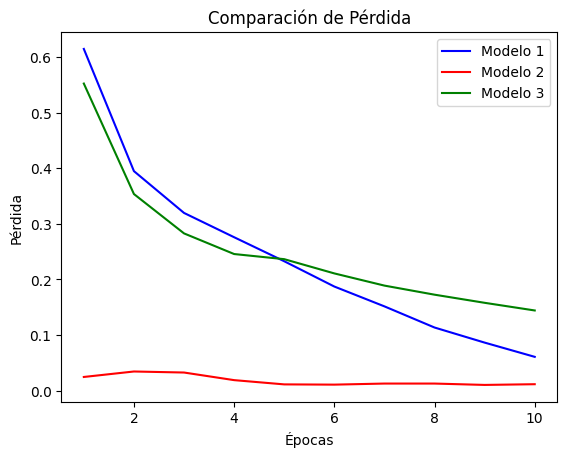

In [ ]:
loss1 = history1.history['loss']
loss2 = history2.history['loss']
loss3 = history3.history['loss']

epochs = range(1, len(loss1) + 1)

plt.plot(epochs, loss1, 'b', label='Modelo 1')
plt.plot(epochs, loss2, 'r', label='Modelo 2')
plt.plot(epochs, loss3, 'g', label='Modelo 3')

plt.title('Comparación de Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

In [ ]:
# Obtener los valores de pérdida y exactitud de cada modelo
train_loss1 = history1.history['loss'][-1]
val_loss1 = history1.history['val_loss'][-1]
train_acc1 = history1.history['acc'][-1]
val_acc1 = history1.history['val_acc'][-1]

train_loss2 = history2.history['loss'][-1]
val_loss2 = history2.history['val_loss'][-1]
train_acc2 = history2.history['acc'][-1]
val_acc2 = history2.history['val_acc'][-1]

train_loss3 = history3.history['loss'][-1]
val_loss3 = history3.history['val_loss'][-1]
train_acc3 = history3.history['acc'][-1]
val_acc3 = history3.history['val_acc'][-1]

# Crear encabezados de la tabla
headers = ['Modelo', 'Pérdida (entrenamiento)', 'Exactitud (entrenamiento)', 'Pérdida (validación)', 'Exactitud (validación)']

# Crear lista de listas con los datos de la tabla
table_data = [
    ['Modelo 1', '{:.4f}'.format(train_loss1), '{:.4f}'.format(train_acc1), '{:.4f}'.format(val_loss1), '{:.4f}'.format(val_acc1)],
    ['Modelo 2', '{:.4f}'.format(train_loss2), '{:.4f}'.format(train_acc2), '{:.4f}'.format(val_loss2), '{:.4f}'.format(val_acc2)],
    ['Modelo 3', '{:.4f}'.format(train_loss3), '{:.4f}'.format(train_acc3), '{:.4f}'.format(val_loss3), '{:.4f}'.format(val_acc3)]
]

# Imprimir la tabla
for header in headers:
    print('{:<25}'.format(header), end='')
print()
for row in table_data:
    for value in row:
        print('{:<25}'.format(value), end='')
    print()


Modelo                   Pérdida (entrenamiento)  Exactitud (entrenamiento)Pérdida (validación)     Exactitud (validación)   
Modelo 1                 0.0608                   0.9800                   0.5713                   0.8306                   
Modelo 2                 0.0116                   0.9965                   1.1635                   0.7882                   
Modelo 3                 0.1442                   0.9506                   0.3975                   0.8575                   


####4. Evaluación del modelo

In [ ]:
#Evaluación del modelo en los datos de prueba
results = model3.evaluate(x_test, y_test)

#Resultados
print("Exactitud Entrenamiento: "+str(round(results[1]*100,4))+"%")
print("Pérdida Entrenamiento: " + str(round(results[0],4)))

391/391 [==============================] - 5s 13ms/step - loss: 0.3800 - acc: 0.8624
Exactitud Entrenamiento: 86.24%
Pérdida Entrenamiento: 0.38


391/391 [==============================] - 11s 27ms/step


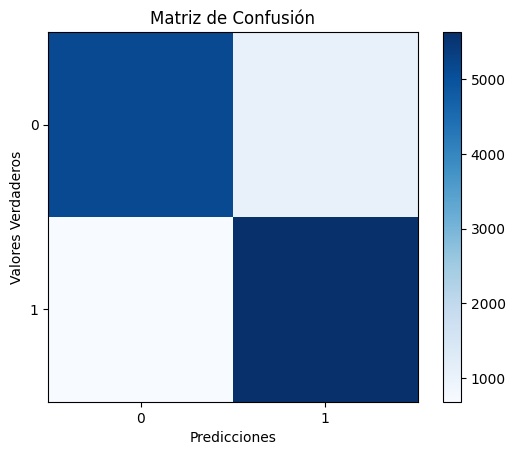

In [ ]:
# Obtener las predicciones del modelo en los datos de prueba
y_pred = model3.predict(x_test)
y_pred = np.round(y_pred).flatten()  # Redondear las predicciones a 0 o 1

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión en formato gráfico
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'])
plt.yticks(tick_marks, ['0', '1'])
plt.show()